<center><div style="direction:rtl;font-family:B Lotus, B Nazanin, Tahoma">به نام خدا</div></center>

<h1><center><div style="direction:rtl;font-family:B Lotus, B Nazanin, Tahoma">تمرین عملی 2: طبقه بندی تصاویر Cifar10 با شبکه های کانولوشنالی روی googleColab</div></center></h1>

[![Run in Google Colab](https://github.com/alireza-akhavan/SRU-deeplearning-workshop/blob/master/homework/images/colab.png?raw=1)](https://colab.research.google.com/github/alireza-akhavan/SRU-deeplearning-workshop/blob/master/homework/ex2-conv-cifar10-in-colab.ipynb)

## <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">صورت مساله</div>


<div style="direction:rtl;text-align:right;font-family:Tahoma">
با شبکه های کانولوشنالی آشنا شدیم<br>
توصیه می‌شود حتما بعد از تمرین اول این تمرین را حل کنید و قبل از این تمرین نوت بوک زیر را  مرور کنید:
</div>

[06_ConvolutionalNeuralNetwork-Hoda-Keras.ipynb ](https://nbviewer.jupyter.org/github/alireza-akhavan/SRU-deeplearning-workshop/blob/master/06_ConvolutionalNeuralNetwork-Hoda-Keras.ipynb)

<div style="direction:rtl;text-align:right;font-family:Tahoma">
در این تمرین از مجموعه داده تصویری cifar10 استفاده خواهیم کرد.
<br>
خیلی از اوقات ممکنه دسترسی به GPU نداشته باشیم. حخوشبختانه سرویس های آنلاین و رایگانی هستند که توان محاسباتی رایگان در اختیارمان میگذراند. در این تمرین از شما خواسته شده که این نوت بوک را در گوگل کولب اجرا کنید.
<br>
 قبلا در مورد گوگل کولب دو پست آموزشی نوشته شده است که در صورت تمایل به کسب اطلاعات بیشتر میتوانید بخوانید.
    اما برای اجرا این تمرین نیازی به این جزئیات نخواهید داشت.
</div>

[آشنایی با سرویس ابری Google Colab ](http://blog.class.vision/1397/02/google-colab/)

[اتصال مستقیم سرویس کولب (Google Colab) به درایو (Google Drive) از طریق فایل سیستم FUSE ](http://blog.class.vision/1397/04/%D8%A7%D8%AA%D8%B5%D8%A7%D9%84-%D9%85%D8%B3%D8%AA%D9%82%DB%8C%D9%85-%D8%B3%D8%B1%D9%88%DB%8C%D8%B3-%DA%A9%D9%88%D9%84%D8%A8-google-colab-%D8%A8%D9%87-%D8%AF%D8%B1%D8%A7%DB%8C%D9%88-google-drive/)


## <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">لود کتابخانه های مورد نیاز </div>
<div style="direction:rtl;text-align:right;font-family:Tahoma">
کتابخانه های مورد نیاز این تمرین لود شده اند
<br>
در صورت نیاز میتوانید کتابخانه های بیشتری لود کنید:
</div>

In [36]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.layers import Conv2D, MaxPooling2D
from keras.datasets import cifar10
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">مجموعه داده ی Cifar10 </div>
<div style="direction:rtl;text-align:right;font-family:Tahoma">
<br>
این مجموعه داده تصاویر رنگی در اندازه ی 32 در 32 و در 10 کلاس مختلف شامل ماشین، کامیون، اسب و ... است که در چارچوب کراس موجود است و از همان استفاده میکنیم.
<br>
اطلاعات بیشتر در مورد این مجموعه داده را از سایت این مجموعه داده میتوانید مطالعه کنید:
<br>
</div>

https://www.cs.toronto.edu/~kriz/cifar.html

In [37]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

## <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">نگاهی به مجموعه داده بیندازیم...</div>
<div style="direction:rtl;text-align:right;font-family:Tahoma">
در زیر تصویری که در اندیس 7-ام این مجموعه داده قرار دارد را مشاهده می‌کنیم. این شماره را را به دلخوه عوض کنید و چند تصویر دیگر این مجموعه داده را ببینید.
</div>


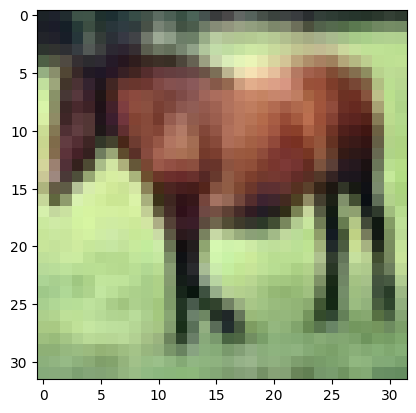

In [38]:
plt.imshow(x_train[7])

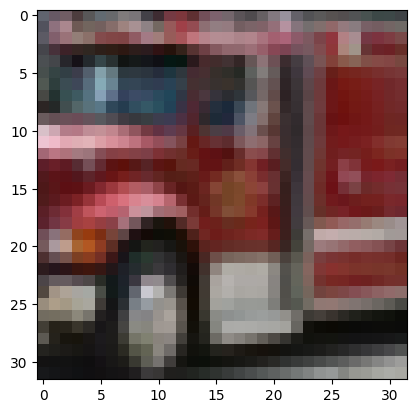

In [39]:
plt.imshow(x_train[88])

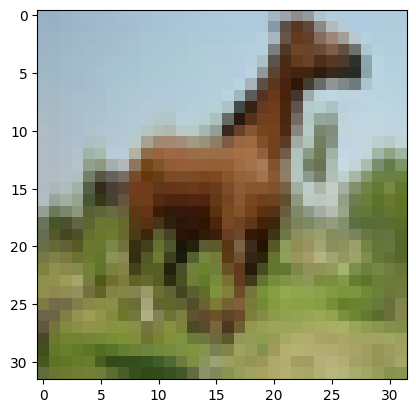

In [40]:
plt.imshow(x_train[256])

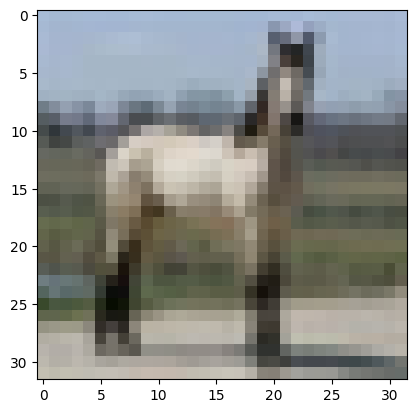

In [41]:
plt.imshow(x_train[789])

# <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">سوال 1:</div>
<div style="direction:rtl;text-align:right;font-family:Tahoma">
ماتریس های تصویر را تبدیل به نوع داده ای float32 کنید و مقادیر پیکسل ها را نرمال کنید و بین 0 و 1 بیاورید.
<br>
<b>راهنمایی: </b>
شما باید متد astype را صدا بزنید و در نهایت مقادیر پیکسل ها را تقسیم بر 255 کنید.</div>

In [42]:


# Preprocess input data
'''3.2 normalize our data values to the range [0, 1]'''
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255


# <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">سوال 2:</div>
<div style="direction:rtl;text-align:right;font-family:Tahoma">
همان طور که میبینید لیبل ها از نوع عددی هستند. آن ها را تبدیل به فرمت one-hot کنید.<br>
</div>


<hr>
<div style="direction:rtl;text-align:right;font-family:Tahoma">
تعدادی از لیبل ها قبل از تبدیل به فرمت one-hot:</div>

In [43]:
y_train[0:10]

array([[6],
       [9],
       [9],
       [4],
       [1],
       [1],
       [2],
       [7],
       [8],
       [3]], dtype=uint8)

In [44]:
# Preprocess class labels
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test =  keras.utils.to_categorical(y_test, num_classes=10)



# # Import the necessary function from keras
# from tensorflow.keras.utils import to_categorical

# # Convert class labels to one-hot encoded format
# y_train = to_categorical(y_train, num_classes=10)
# y_test = to_categorical(y_test, num_classes=10)


<div style="direction:rtl;text-align:right;font-family:Tahoma">
تعدادی از لیبل ها بعد از تبدیل به فرمت one-hot:</div>

In [45]:
y_train[0:10]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]])

In [46]:
y_train[10]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.])

# <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">سوال 3:</div>
<div style="direction:rtl;text-align:right;font-family:Tahoma">
یک شبکه کانولوشنالی با معماری زیر بسازید:
<ul>
    <li>
    یک لایه کانولوشنی با32 فیلتر با سایز فیلتر 3x3 و تابع فعالیت relu
    </li>
    <li>
    لایه ی pooling با pool_size=(2,2)
    </li>
    <li>
    یک لایه کانولوشنی با32 فیلتر با سایز فیلتر 3x3 و تابع فعالیت relu
    </li>
    <li>
    لایه ی pooling با pool_size=(2,2)
    </li>
    <li>
    یک لایه کانولوشنی با64 فیلتر با سایز فیلتر 3x3 و تابع فعالیت relu
    </li>
    <li>
    لایه ی pooling با pool_size=(2,2)
    </li>
    <li>
    استفاده از لایه ی Flatten() . به نظرتون چرا؟
    </li>    
    <li>
    یک لایه Dropout با ترخ 0.5.
    </li>
    <li>
    یک لایه softmax برای احتمالات خروجی. به نظرتون این لایه چند نوران میخواهد؟
    </li>    

</ul>
</div>


In [47]:
# Define model architecture
# model = Sequential()
# model.add(layers.Conv2D(32, (3, 3), activation='relu',
#                         input_shape=(32, 32, 1)))
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Conv2D(64, (3, 3), activation='relu'))
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Conv2D(64, (3, 3), activation='relu'))
# model.add(layers.Flatten())
# # model.add(layers.Dense(64, activation='relu'))
# model.add(Dropout(0.5))
# model.add(layers.Dense(10, activation='softmax'))



# from tensorflow.keras import layers, Sequential
# from tensorflow.keras.layers import Dropout

# # Define model architecture
# model = Sequential()
# model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Conv2D(32, (3, 3), activation='relu'))
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Conv2D(64, (3, 3), activation='relu'))
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Flatten())
# model.add(Dropout(0.5))
# model.add(layers.Dense(10, activation='softmax'))


from tensorflow.keras import layers, models
from tensorflow.keras.models import Sequential

# ساخت مدل شبکه کانولوشنی
model = Sequential()

# لایه کانولوشنی اول با 32 فیلتر و سایز فیلتر 3x3
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))

# لایه Pooling اول
model.add(layers.MaxPooling2D((2, 2)))

# لایه کانولوشنی دوم با 32 فیلتر و سایز فیلتر 3x3
model.add(layers.Conv2D(32, (3, 3), activation='relu'))

# لایه Pooling دوم
model.add(layers.MaxPooling2D((2, 2)))

# لایه کانولوشنی سوم با 64 فیلتر و سایز فیلتر 3x3
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# لایه Pooling سوم
model.add(layers.MaxPooling2D((2, 2)))

# لایه Flatten برای تبدیل به یک وکتور 1 بعدی
model.add(layers.Flatten())

# لایه Dropout برای جلوگیری از overfitting
model.add(layers.Dropout(0.5))

# لایه Softmax برای پیش‌بینی خروجی با احتمال
model.add(layers.Dense(10, activation='softmax'))

# خلاصه مدل
model.summary()


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)                    │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 13, 13, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 6, 6, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 4, 4, 64)            │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 2, 2, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_17 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 31,210 (121.91 KB)

 Trainable params: 31,210 (121.91 KB)

 Non-trainable params: 0 (0.00 B)

In [48]:
import numpy as np

# فرض کنید y_train و y_test به شکل (batch_size, 10, 3) هستند.
# تغییر شکل به (batch_size, 10):
y_train = np.argmax(y_train, axis=-1)
y_test = np.argmax(y_test, axis=-1)

print(y_train.shape) # (batch_size, 10)
print(y_test.shape) # (batch_size, 10)

(50000,)
(10000,)


# <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">سوال 4:</div>
<div style="direction:rtl;text-align:right;font-family:Tahoma">
مدل را کامپایل کنید و به عنوان optimizer متغیر opt_rms به تابع ارسال کنید. </div>


In [49]:
# opt_rms = keras.optimizers.RMSprop(learning_rate=0.001,decay=1e-6)

# # 6. Compile model
# model.compile(loss='categorical_crossentropy',
#               optimizer='adam',
#               metrics=['accuracy'])

# model.compile(optimizer=opt_rms, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# # model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


# from tensorflow.keras.optimizers.schedules import ExponentialDecay
# from tensorflow.keras import optimizers

# # استفاده از ExponentialDecay به جای decay
# lr_schedule = ExponentialDecay(initial_learning_rate=0.001, decay_steps=100000, decay_rate=0.96, staircase=True)
# opt_rms = optimizers.RMSprop(learning_rate=lr_schedule)

# # حالا می‌توانید اپتیمایزر را هنگام کامپایل مدل ارسال کنید:
# model.compile(optimizer=opt_rms, loss='sparse_categorical_crossentropy', metrics=['accuracy'])


# model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])



from tensorflow.keras.optimizers.schedules import ExponentialDecay
from tensorflow.keras import optimizers

# استفاده از ExponentialDecay به جای decay
lr_schedule = ExponentialDecay(initial_learning_rate=0.0001, decay_steps=100000, decay_rate=0.96, staircase=True)

opt_rms = optimizers.RMSprop(learning_rate=lr_schedule)

# حالا می‌توانید اپتیمایزر را هنگام کامپایل مدل ارسال کنید
model.compile(optimizer=opt_rms, loss='sparse_categorical_crossentropy', metrics=['accuracy'])


# <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">سوال 5:</div>
<div style="direction:rtl;text-align:right;font-family:Tahoma">
با فراخوانی متد fit روی مدل آن را آموزش بدهید. برای سادگی25 ایپاک با سایز بچ 64 بزنید.
    <br>
 به عنوان دیتای validation نیز x_test و y_test را ارسال کنید که در هر سری کارایی روی داده های تست اعلام شود.
</div>

In [50]:
# pip install --upgrade tensorflow


In [51]:
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)


(50000, 32, 32, 3) (50000,) (10000, 32, 32, 3) (10000,)


In [52]:

# Fit model on training data
# history = model.fit(X_train, y_train,
#           epochs=25, batch_size=64, validation_split=0.2)

# مدل را با استفاده از متد fit آموزش دهید
history=model.fit(x_train, y_train,
          batch_size=64,epochs=25,validation_data=(x_test, y_test))




Epoch 1/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 57s 71ms/step - accuracy: 0.1532 - loss: 2.2513 - val_accuracy: 0.2925 - val_loss: 2.0034
Epoch 2/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 51s 65ms/step - accuracy: 0.2699 - loss: 1.9850 - val_accuracy: 0.3539 - val_loss: 1.8226
Epoch 3/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 84s 67ms/step - accuracy: 0.3170 - loss: 1.8465 - val_accuracy: 0.3835 - val_loss: 1.7245
Epoch 4/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 81s 66ms/step - accuracy: 0.3440 - loss: 1.7716 - val_accuracy: 0.4028 - val_loss: 1.6730
Epoch 5/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 81s 64ms/step - accuracy: 0.3675 - loss: 1.7034 - val_accuracy: 0.4072 - val_loss: 1.6583
Epoch 6/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 84s 66ms/step - accuracy: 0.3889 - loss: 1.6508 - val_accuracy: 0.4279 - val_loss: 1.5917
Epoch 7/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 52s 66ms/step - accuracy: 0.4067 - loss: 1.6092 - val_accuracy: 0.4530 - val_loss: 1.5163
Epoch 8/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 82s 66ms/step - accuracy: 0.4165 - loss: 1.5758 - 

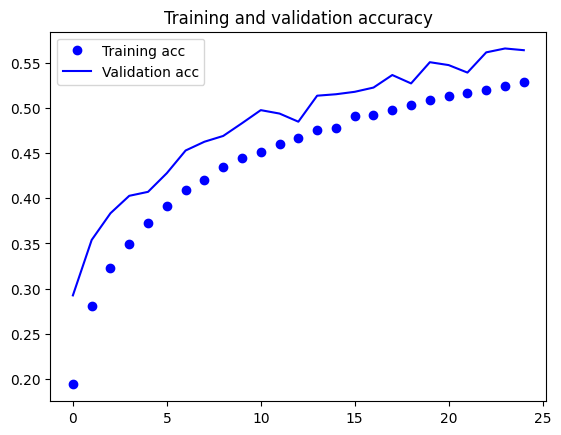

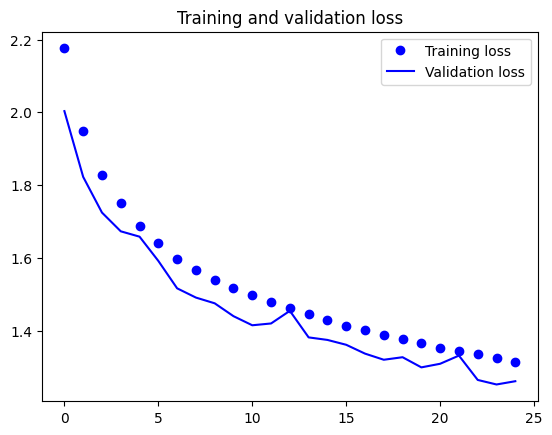

In [53]:
import matplotlib.pyplot as plt
%matplotlib inline
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">سوال 6:</div>
<div style="direction:rtl;text-align:right;font-family:Tahoma">
شبکه و هایپرپارامترهای این شبکه را به هر نحوی دوست دارید تغییر دهید تا دقت روی دادگان تست را به حداکثر برسانید.
</div>


<div class="alert alert-block alert-info">
<div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma"> دوره مقدماتی یادگیری عمیق<br>علیرضا اخوان پور<br>پنج شنبه، ۱۸ و ۲۵ بهمن ۱۳۹۷<br>
</div>
<a href="http://class.vision">Class.Vision</a> - <a href="http://AkhavanPour.ir">AkhavanPour.ir</a> - <a href="https://github.com/Alireza-Akhavan/">GitHub</a>

</div>

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.datasets import cifar10  # به عنوان نمونه

# بارگذاری و پیش‌پردازش داده‌ها (به عنوان نمونه از CIFAR-10 استفاده می‌کنیم)
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# نرمال‌سازی داده‌ها
x_train, x_test = x_train / 255.0, x_test / 255.0

# تبدیل برچسب‌ها به قالب one-hot encoding
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# تعریف مدل CNN
model = Sequential()

# لایه‌های کانولوشن برای استخراج ویژگی‌های تصویر
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))  # تغییر اندازه ورودی
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

# Flatten کردن برای اتصال به لایه‌های Dense
model.add(Flatten())

# لایه‌های Fully Connected (Dense)
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(BatchNormalization())

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(10, activation='softmax'))  # تعداد کلاس‌ها در اینجا 10 است (برای CIFAR-10)

# کامپایل مدل با استفاده از Adam optimizer
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# تنظیمات EarlyStopping برای جلوگیری از overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# آموزش مدل
model.fit(x_train, y_train, epochs=50, batch_size=64, validation_data=(x_test, y_test), callbacks=[early_stopping])

# ارزیابی مدل روی داده‌های تست
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Test accuracy: {test_acc:.4f}")


Epoch 1/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 80s 99ms/step - accuracy: 0.1315 - loss: 2.4535 - val_accuracy: 0.1962 - val_loss: 2.1447
Epoch 2/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 74s 89ms/step - accuracy: 0.2724 - loss: 1.8706 - val_accuracy: 0.3653 - val_loss: 1.7503
Epoch 3/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 84s 91ms/step - accuracy: 0.3629 - loss: 1.7014 - val_accuracy: 0.4354 - val_loss: 1.5701
Epoch 4/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 81s 89ms/step - accuracy: 0.4206 - loss: 1.5770 - val_accuracy: 0.4754 - val_loss: 1.4375
Epoch 5/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 82s 89ms/step - accuracy: 0.4494 - loss: 1.5176 - val_accuracy: 0.5179 - val_loss: 1.3681
Epoch 6/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 69s 88ms/step - accuracy: 0.4770 - loss: 1.4574 - val_accuracy: 0.5222 - val_loss: 1.3388
Epoch 7/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 82s 89ms/step - accuracy: 0.4885 - loss: 1.4269 - val_accuracy: 0.5462 - val_loss: 1.3172
Epoch 8/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 83s 90ms/step - accuracy: 0.5054 - loss: 1.3877 - 

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import GlobalAveragePooling2D

# مرحله 1: Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=20,            # چرخش تصادفی تصاویر
    width_shift_range=0.2,        # جابجایی عرض
    height_shift_range=0.2,       # جابجایی ارتفاع
    shear_range=0.2,              # تغییر شکل تصادفی
    zoom_range=0.2,               # بزرگنمایی یا کوچک‌سازی تصادفی
    horizontal_flip=True,         # چرخش افقی
    fill_mode='nearest'           # نحوه پر کردن پیکسل‌های خالی
)
datagen.fit(x_train)

# مرحله 2: استفاده از مدل پیش‌آموزش‌دیده (VGG16)
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
base_model.trainable = False  # فریز کردن مدل

# ساخت مدل جدید
model = Sequential([
    base_model,  # استفاده از VGG16 به عنوان مدل پایه
    BatchNormalization(),  # نرمال‌سازی دسته‌ای
    GlobalAveragePooling2D(),
    Dense(512, activation='relu'),
    Dropout(0.5),  # Dropout برای جلوگیری از overfitting
    Dense(256, activation='relu'),
    Dropout(0.5),  # Dropout مجدد
    Dense(10, activation='softmax')  # تعداد کلاس‌ها را به 10 تنظیم کنید
])

# تنظیم مدل
optimizer = Adam(learning_rate=0.0001)  # انتخاب Adam به عنوان optimizer با learning rate پایین
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# آموزش مدل
model.fit(datagen.flow(x_train, y_train, batch_size=64), epochs=50, validation_data=(x_test, y_test))
